Assignment 2 For Clustering: Sessa Empirical Estimator
1. Read the Journals about the Sessa Empirical Estimator.
2. Convert the R codes into Python Codes (use jupyter notebook).
3. Using Simulated data (https://www.frontiersin.org/journals/pharmacology/articles/10.3389/fphar.2019.00383/full) or a real world datasets of your choice (You can obtain it in Kaggle or in https://archive.ics.uci.edu/), perform the Sessa Empircal Estimator and generate some insights.
4. The Sessa Empirical Estimator uses K-Means clustering (again recall the disadvantages of K-Means), try to substitute a different clustering algorithm, generate a new insight using the new clustering algorithm.
5. Compare your results between Sessa Empirical Estimator using K-Means, and Sessa Empirical Estimator using the clustering algorithm of your choice.
6. Deadline is this Sunday, Feb 23, 2022 at 11:59 pm
7. Do this with your thesis partner.
8. You can use any A.I. assistant.

---

USING SIMULATED DATASET

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of patients
num_patients = 500

# Observation period: 2 years (2022-01-01 to 2023-12-31)
start_date = pd.to_datetime("2022-01-01")
end_date = pd.to_datetime("2023-12-31")

# Adherence categories and their refill behavior
adherence_groups = {
    "High Adherence": {"min_gap": 25, "max_gap": 45},  # Regular refills (30-45 days)
    "Medium Adherence": {"min_gap": 45, "max_gap": 90}, # Occasional gaps (45-90 days)
    "Low Adherence": {"min_gap": 90, "max_gap": 150} # Large gaps in refills (90+ days)
}

# List to store generated data
data = []

for patient_id in range(1, num_patients + 1):
    # Assign adherence group randomly
    adherence_group = np.random.choice(list(adherence_groups.keys()), p=[0.5, 0.3, 0.2])
    min_gap = adherence_groups[adherence_group]["min_gap"]
    max_gap = adherence_groups[adherence_group]["max_gap"]
    
    # Choose a random medication
    medication = np.random.choice(["medA", "medB", "medC"])
    
    # Generate refill history
    refill_date = start_date + pd.to_timedelta(np.random.randint(0, 30), unit="D")  # First refill
    while refill_date <= end_date:
        days_supply = np.random.choice([30, 60, 90])  # Varying prescription durations
        data.append([patient_id, refill_date, medication, days_supply, adherence_group])
        refill_date += pd.to_timedelta(np.random.randint(min_gap, max_gap), unit="D")  # Next refill

# Create DataFrame
df = pd.DataFrame(data, columns=["patient_id", "prescription_date", "medication", "days_supply", "adherence_group"])

# Calculate time between refills per patient
df = df.sort_values(by=["patient_id", "prescription_date"])
df["prev_prescription_date"] = df.groupby("patient_id")["prescription_date"].shift(1)
df["time_between_refills"] = (df["prescription_date"] - df["prev_prescription_date"]).dt.days

# Save as CSV
csv_filename = "simulated_refill_data.csv"
df.to_csv(csv_filename, index=False)

# Show preview of the dataset
df.sample(15)


,patient_id,prescription_date,medication,days_supply,adherence_group,prev_prescription_date,time_between_refills
503,36,2023-12-21,medB,60,High Adherence,2023-11-23,28.0
6583,436,2023-02-15,medB,30,High Adherence,2023-01-19,27.0
1615,112,2022-04-19,medA,30,High Adherence,2022-03-13,37.0
5558,366,2023-02-23,medC,30,High Adherence,2023-01-11,43.0
4032,267,2022-01-12,medB,30,Medium Adherence,NaT,NaN
5076,334,2022-06-04,medB,90,High Adherence,2022-04-28,37.0
1107,77,2022-04-13,medA,60,Medium Adherence,2022-01-20,83.0
4083,271,2022-04-15,medC,60,High Adherence,2022-03-05,41.0
5680,376,2022-03-30,medA,30,High Adherence,2022-02-26,32.0
1812,122,2022-01-17,medA,60,High Adherence,NaT,NaN


In [37]:
medA_result = See("medA", df)
print(medA_result.sample(10))

      patient_id prescription_date prev_prescription_date  time_between_prescriptions  cluster
4289         280        2023-10-04             2023-09-05                        29.0        2
987           68        2023-05-12             2023-04-11                        31.0        2
3269         215        2023-02-17             2023-01-17                        31.0        2
3368         222        2022-03-13             2022-02-11                        30.0        2
6894         454        2023-11-17             2023-10-06                        42.0        0
2429         163        2023-11-13             2023-10-05                        39.0        0
5591         368        2022-10-21             2022-08-20                        62.0        1
5209         341        2023-02-18             2023-01-19                        30.0        2
1268          88        2022-12-24             2022-11-26                        28.0        2
6267         417        2023-02-20             202

In [39]:

medB_result = See("medB", df)
print(medB_result.sample(10))


      patient_id prescription_date prev_prescription_date  time_between_prescriptions  cluster
960           67        2022-10-01             2022-09-05                        26.0        2
6902         455        2022-07-29             2022-07-03                        26.0        2
2307         155        2022-07-30             2022-06-27                        33.0        2
231           17        2023-12-08             2023-11-11                        27.0        2
5353         350        2023-04-16             2023-03-10                        37.0        0
851           59        2022-04-15             2022-03-19                        27.0        2
7284         481        2022-03-13             2022-02-14                        27.0        2
7074         466        2023-01-15             2022-12-16                        30.0        2
3446         226        2022-11-25             2022-10-08                        48.0        1
5908         389        2022-10-28             202

In [38]:
medC_result = See("medC", df)
print(medC_result.sample(10))

      patient_id prescription_date prev_prescription_date  time_between_prescriptions  cluster
6161         409        2023-07-21             2023-06-14                        37.0        0
276           21        2023-08-23             2023-07-11                        43.0        0
4083         271        2022-04-15             2022-03-05                        41.0        0
1849         123        2023-07-30             2023-06-27                        33.0        1
4018         265        2023-06-11             2023-05-12                        30.0        1
6659         441        2022-08-25             2022-07-13                        43.0        0
5529         364        2023-06-16             2023-05-06                        41.0        0
7384         489        2022-02-08             2022-01-02                        37.0        0
6721         444        2023-07-03             2023-05-20                        44.0        0
7386         489        2022-04-25             202

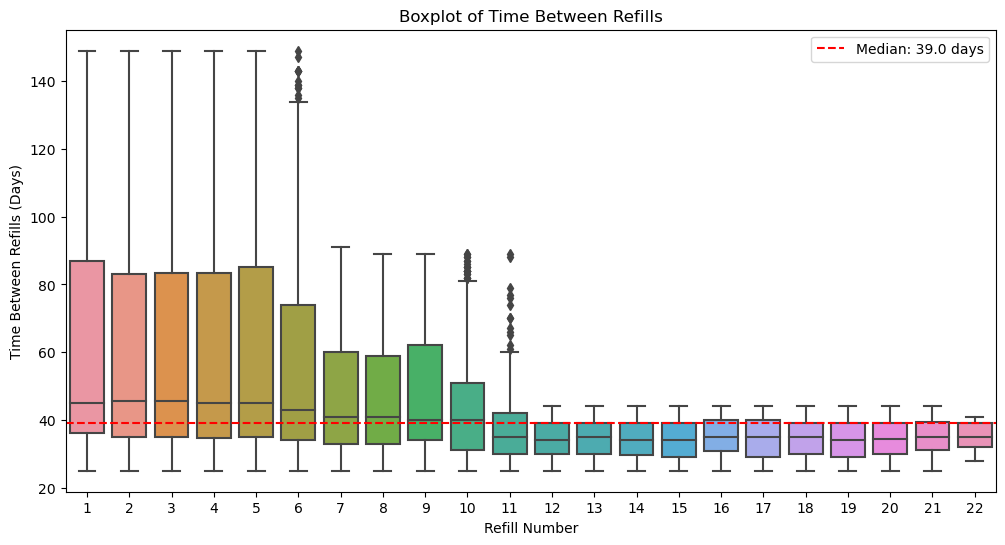

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def see_assumption(df):
    # Sort and calculate time between prescriptions
    df = df.sort_values(by=["patient_id", "prescription_date"])
    df["prev_prescription_date"] = df.groupby("patient_id")["prescription_date"].shift(1)
    df["time_between_refills"] = (df["prescription_date"] - df["prev_prescription_date"]).dt.days
    
    # Remove NaN values (first prescriptions have no previous date)
    df = df.dropna(subset=["time_between_refills"])
    
    # Assign a refill sequence number per patient
    df["refill_number"] = df.groupby("patient_id").cumcount() + 1

    # Create the boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df["refill_number"], y=df["time_between_refills"])
    
    # Calculate and plot the median refill interval
    median_duration = df["time_between_refills"].median()
    plt.axhline(y=median_duration, color="red", linestyle="dashed", label=f"Median: {median_duration:.1f} days")

    # Plot formatting
    plt.title("Boxplot of Time Between Refills")
    plt.xlabel("Refill Number")
    plt.ylabel("Time Between Refills (Days)")
    plt.legend()
    plt.show()

# Load the dataset
df = pd.read_csv("simulated_refill_data.csv", parse_dates=["prescription_date"])



# Run the function
see_assumption(df)
